In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import kurtosis,skew
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the datasets

data =pd.read_csv(
    "applicant.csv",
    names=[
        "Age","Workclass","fnlwgt","Education","Education-Num","Marital Status",
        "Occupation","Relationship","Race","Gender","Capital Gain","Capital Loss",
        "Hours per week","Country","Target"],
    sep=r'\s*,\s*',
    engine='python',
    na_values='?')

In [3]:
#Checking the data sample
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
 #(Q) how many data-points and features?
print (data.shape)

(32561, 15)


In [5]:
#(Q) What are the column names in our dataset?
print (data.columns)

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')


In [6]:
#(Q) How many data points for each class are present? 

data["Target"].value_counts()


<=50K    24720
>50K      7841
Name: Target, dtype: int64

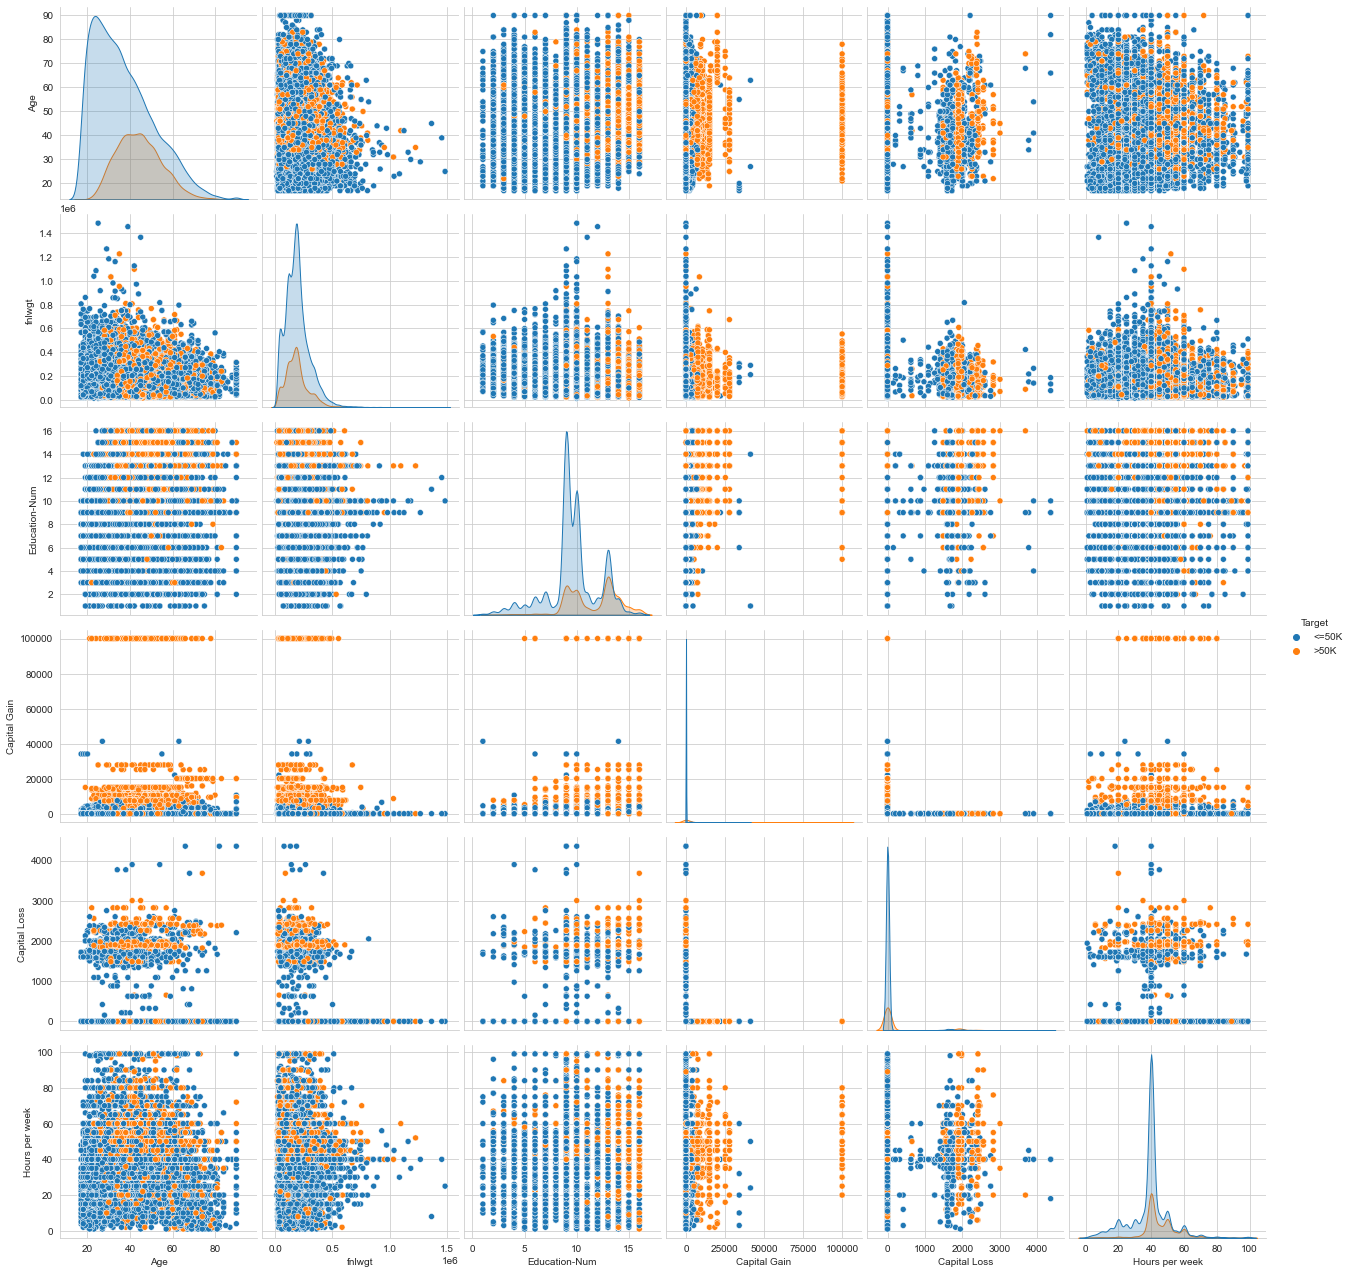

In [7]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Target", size=3);
plt.show()

In [8]:
#Looking at statistical features:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours per week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [9]:
#checking null value

data.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Gender               0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

In [10]:
#information about datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-Num   32561 non-null  int64 
 5   Marital Status  32561 non-null  object
 6   Occupation      30718 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital Gain    32561 non-null  int64 
 11  Capital Loss    32561 non-null  int64 
 12  Hours per week  32561 non-null  int64 
 13  Country         31978 non-null  object
 14  Target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


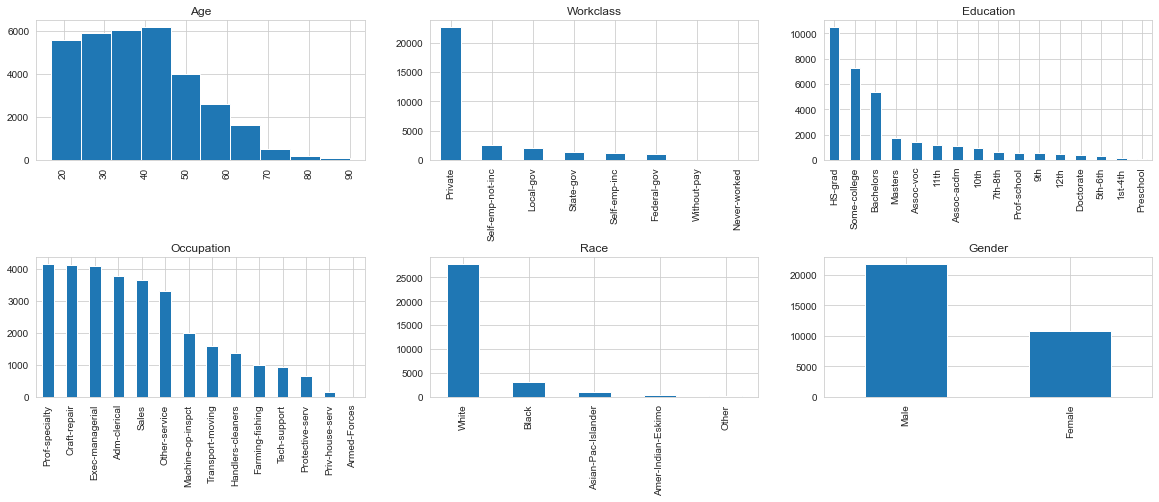

In [11]:
#relational plot
import math
get_ipython().run_line_magic('matplotlib', 'inline')

fig = plt.figure(figsize=(20,20))
cols=3
rows=math.ceil(float(data.shape[1])/cols)

for i,column in enumerate(['Age','Workclass','Education','Occupation','Race','Gender']):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if data.dtypes[column] ==np.object: 
        data[column].value_counts().plot(kind="bar",axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation='vertical')
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [12]:
#Encoding Occupation and Target column
import sklearn.preprocessing as preprocessing
le=preprocessing.LabelEncoder()
data['Occupation']=le.fit_transform(data['Occupation'].astype(str))
data.head()


data['Target']=le.fit_transform(data['Target'].astype(str))
data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,3,Wife,White,Female,15024,0,40,United-States,1


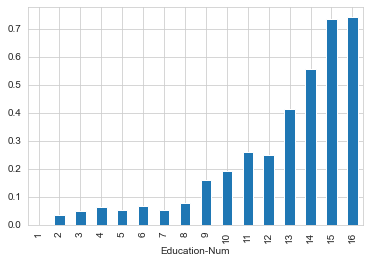

In [13]:
#show the graph
data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()

In [14]:
#Spliting dataset into train test data
from sklearn.model_selection import train_test_split
X=data[['Education-Num','Occupation']]
Y=data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [15]:
#train the model using SVM classifier (SVC)
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7861200675571933


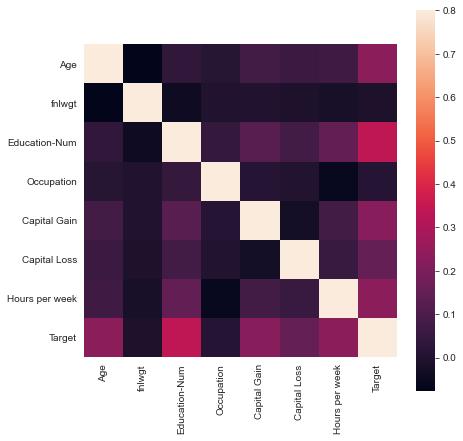

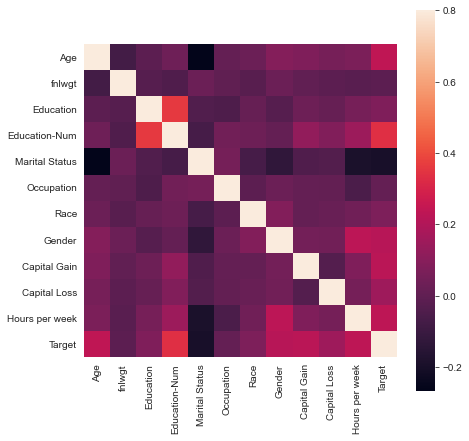

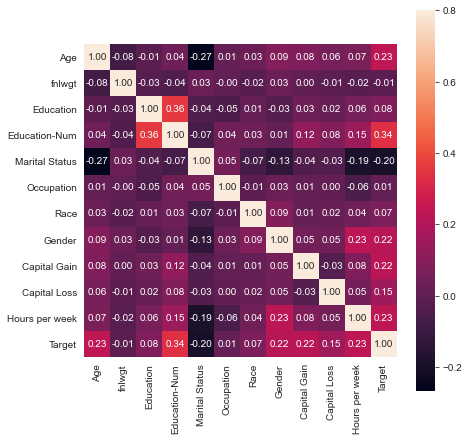

In [17]:
#seaborn for heatmap charts
import seaborn as sns
corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

data['Race']=le.fit_transform(data['Race'].astype(str))
data['Gender']=le.fit_transform(data['Gender'].astype(str))
data['Marital Status']=le.fit_transform(data['Marital Status'].astype(str))
data['Education']=le.fit_transform(data['Education'].astype(str))
corrmat=data.corr()
f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8, square=True);
plt.show()

f,ax=plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

In [18]:
#score the model
X=data[['Education-Num','Occupation','Age','Gender']]
Y=data['Target']
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
classifier=SVC()
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)


classifier =SVC(kernel='rbf', C=1.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

classifier =SVC(kernel='linear', C=10.0)
classifier.fit(X_train,Y_train)
score=classifier.score(x_test,y_test)
print(score)

0.7953324120988792
0.7953324120988792
0.796714263780132
